# Histograms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

<hr>
<br>
<br>

## How has the NBA changed since 1950?

#### Load Seasons Data

In [2]:
nba = pd.read_csv("../data/nba_1950/season_stats.csv")

#### But first, Quick Exploration of the dataset.

[Data Dictionary](https://www.basketball-reference.com/about/glossary.html)

In [ ]:
nba.info()

#### Lets look at a few of the rows.

In [ ]:
nba.head(10)

#### What are some things that you notice right off the bat?

In [ ]:
nba.tail(10)

<br>

### Shooting Percentage

#### Use pandas `.value_counts()` to look at the distribution of `TS%`.

In [ ]:
shoot_percentage = nba['TS%'].value_counts()
shoot_percentage.head()

#### Use pandas `.hist()` method to visualize distribution of `TS%`

In [ ]:
nba['TS%'].hist(bins=20)

# Make it pretty
ax = plt.gca()
ax.set_title("True Shooting % Across all NBA Seasons")
ax.set_xlabel("True Shooting Percentage")
ax.set_ylabel("# of Players")

# "print" the plot
plt.show()

<br>

### Prep work for Answering Question. 

In [8]:
first_year = nba['Year'].min()
last_year = nba['Year'].max()
print(first_year)
print(last_year)

1950.0
2017.0


In [9]:
nba_1950 = nba[nba['Year'] == first_year]
nba_2017 = nba[nba['Year'] == last_year]

<br>

### Shooting Percentage in 1950

In [ ]:
nba_1950['TS%'].hist(bins=20)

# Make it pretty
ax = plt.gca()
ax.set_title("True Shooting in 1950")
ax.set_xlabel("True Shooting Percentage")
ax.set_ylabel("# of Players")

# "print" the plot
plt.show()

<br>

### Shooting Percentage in 2017

In [ ]:
nba_2017['TS%'].hist(bins=20)

# Make it pretty
ax = plt.gca()
ax.set_title("True Shooting % in 2017")
ax.set_xlabel("True Shooting Percentage")
ax.set_ylabel("# of Players")

# "print" the plot
plt.show()

<br>

#### Using only the data from the Histograms for both years... What has happened to the True Shooting Percentage between 1950 and 2017?

In [ ]:
#short answer

<hr>
<br>
<br>

## Does The College that a player attended affect performance in NBA?

#### Load Player Data

In [3]:
players = pd.read_csv('../data/nba_1950/player_data.csv')

In [4]:
top_5_colleges = ['University of Kentucky',
                  'Duke Univeristy',
                  'University of Kansas',
                  'Syracuse University',
                  'University of California, Los Angeles']

#### Lets take a look at `college` column of `players`

In [ ]:
players['college'].value_counts().head(10)

#### We'll use Pandas `.isin()` method to check `college` column against 

#### `top_5_colleges` list.

In [5]:
in_top_5_colleges = players['college'].isin(top_5_colleges)
# print(in_top_5_colleges)

#### Index `players` by `in_top_5_colleges` and grab `name`

In [6]:
# index entire players df by "in_top_5"
players_in_top_5 = players[in_top_5_colleges]['name']
players_in_top_5.head(20)

<br>

#### We'll use Pandas `.isin()` method to check `players` column in `nba` 
#### against the `players_in_top_5` series we just constructed.

In [ ]:
in_top_colleges = nba['Player'].isin(players_in_top_5)

<br>

#### We will divide all of the rows of `nba` into `2` dataframes, those players who attended the top colleges, and those who did not.

In [ ]:
top_college = nba[in_top_colleges]
top_college.shape

In [ ]:
bottom_college = nba[~in_top_colleges]
bottom_college.shape

<br>

#### Plot the Players NOT FROM Top 5

In [ ]:
bottom_college['PER'].hist(bins=50) 

# Make it pretty
ax = plt.gca()
ax.set_title("PER for players NOT FROM Top 5 Colleges")
ax.set_xlabel("Player Efficiency Rating")
ax.set_ylabel("# of Players")

# "print" the plot
plt.show()

#### Plot the Players FROM Top 5

In [ ]:
top_college['PER'].hist(bins=50) 

# Make it pretty
ax = plt.gca()
ax.set_title("PER for players FROM Top 5 Colleges")
ax.set_xlabel("Player Efficiency Rating")
ax.set_ylabel("# of Players")

# "print" the plot
plt.show()

#### What conclusions can we draw about these 2 groups?

In [ ]:
# What could we do better? ...

<hr>
<br>
<br>

## Next Class, After ECDF!

### Run the Excercise back but this time lets limit ourselves to just the players from 2017

In [26]:
top_2017 = nba_2017[nba_2017['Player'].isin(players_in_top_5)]
top_2017["PER"].value_counts().sort_index(ascending=False).head()

30.6    1
27.5    1
26.5    1
26.0    1
25.7    1
Name: PER, dtype: int64

In [25]:
bot_2017 = nba_2017[~nba_2017['Player'].isin(players_in_top_5)]
bot_2017["PER"].value_counts().sort_index(ascending=False).head()

31.5    1
30.8    1
29.6    1
27.6    1
27.5    1
Name: PER, dtype: int64

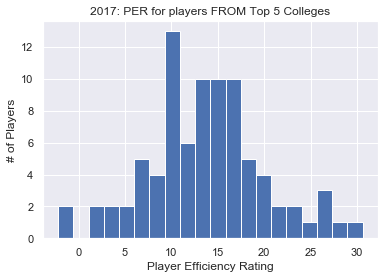

In [18]:
top_2017['PER'].hist(bins=20) 

# Make it pretty
ax = plt.gca()
ax.set_title("2017: PER for players FROM Top 5 Colleges")
ax.set_xlabel("Player Efficiency Rating")
ax.set_ylabel("# of Players")

# "print" the plot
plt.show()

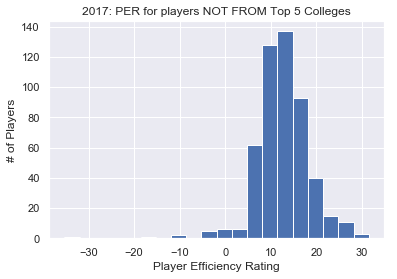

In [17]:
bot_2017['PER'].hist(bins=20) 

# Make it pretty
ax = plt.gca()
ax.set_title("2017: PER for players NOT FROM Top 5 Colleges")
ax.set_xlabel("Player Efficiency Rating")
ax.set_ylabel("# of Players")

# "print" the plot
plt.show()

<br>

### Let's use the ECDF From W1D2, to compare these distributions!

In [27]:
def prep_ecdf(data):
    
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n

    return x, y

In [28]:
# Prep ECDF x and y for PER column of top_2017
tx, ty = prep_ecdf(top_2017['PER'])

# Prep ECDF x and y for PER column of bot_2017
bx, by = prep_ecdf(bot_2017['PER'])

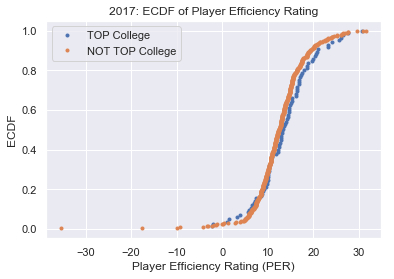

In [30]:
# Set up Figure
plt.figure()

# Grab the `axis` and save to `ax`
ax = plt.gca()

# ax.plot() is a simple `line plot`
ax.plot(tx, ty, marker = ".", linestyle = "none")
ax.plot(bx, by, marker = ".", linestyle = "none")

# Make it Pretty
ax.legend(["TOP College", "NOT TOP College"])
ax.set_title("2017: ECDF of Player Efficiency Rating")
ax.set_xlabel("Player Efficiency Rating (PER)")
ax.set_ylabel("ECDF")

# Remove annoying "out" stuff when printing plot.
plt.show()